In [1]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to change these)
city_data_csv = "data/city_data.csv"
ride_data_csv = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_csv)
ride_data_df = pd.read_csv(ride_data_csv)


In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
#put the two together
city_ride_complete = pd.merge(city_data_df, ride_data_df, how="left", on=["city", "city"])
city_ride_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
#duplicates byyyye
city_data_df = city_data_df.drop_duplicates('city')
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
#city types
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [8]:
#average cost per ride
average_cost = city_ride_complete.groupby("city")["fare"].mean()
average_cost.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [9]:
#rides per city
rides_per_city = city_ride_complete.groupby("city")["ride_id"].count()
rides_per_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [10]:
#drivers per city
drivers_per_city = city_ride_complete.groupby("city")["driver_count"].count()
drivers_per_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

## Bubble Plot of Ride Sharing Data

In [11]:
urban = city_ride_complete[(city_ride_complete["type"] == "Urban")]
suburban = city_ride_complete[(city_ride_complete["type"] == "Suburban")]
rural = city_ride_complete[(city_ride_complete["type"] == "Rural")]

urban_avg = urban.groupby("city")["fare"].mean()
sub_avg = suburban.groupby("city")["fare"].mean()
rural_avg = rural.groupby("city")["fare"].mean()

urban_rides = urban.groupby("city")["ride_id"].count()
sub_rides = suburban.groupby("city")["ride_id"].count()
rural_rides = rural.groupby("city")["ride_id"].count()

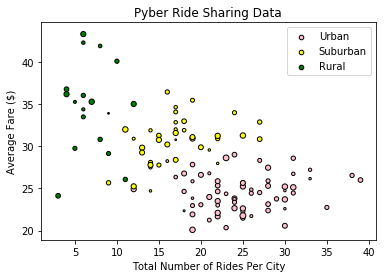

In [12]:
urban_plot=plt.scatter(urban_rides, urban_avg, s=drivers_per_city, c='pink' , linewidths=1, edgecolor='black')
suburban_plot=plt.scatter(sub_rides, sub_avg, s=drivers_per_city, c="yellow" , linewidths=1, edgecolor='black')
rural_plot=plt.scatter(rural_rides, rural_avg, s=drivers_per_city, c="green" , linewidths=1, edgecolor='black')
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")
plt.legend(handles=[urban_plot,suburban_plot,rural_plot], labels=['Urban','Suburban','Rural'])

plt.savefig('pyber_bubble.pdf')

plt.show()

## Total Fares by City Type

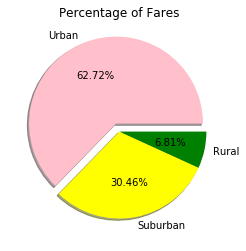

In [13]:
# Calculate Type Percents

urban_cost=urban["fare"].sum()
sub_cost=suburban["fare"].sum()
rural_cost=rural["fare"].sum()

# Build Pie Chart

total_fare =[urban_cost, sub_cost, rural_cost]
explode = [.1,0,0]
labels =["Urban","Suburban","Rural"]
colors = ["pink","yellow","green"]
plt.pie(total_fare,labels=labels,colors=colors,autopct='%1.2f%%',shadow=True,explode=explode)
plt.title("Percentage of Fares")
#show & save
plt.savefig('pyber_percentplot.pdf')
plt.show()

## Total Rides by City Type

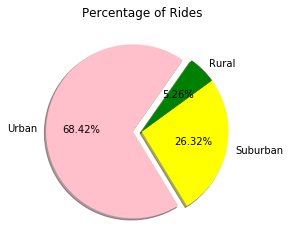

In [14]:
# Show Figure

urban_rides=urban["ride_id"].count()
sub_rides=suburban["ride_id"].count()
rural_rides=rural["ride_id"].count()

total_rides =[urban_rides, sub_rides, rural_rides]
explode = [.1,0,0]
labels =["Urban","Suburban","Rural"]
colors = ["pink","yellow","green"]
plt.pie(total_rides,labels=labels,colors=colors,autopct='%1.2f%%',startangle=55,explode=explode,shadow=True)
plt.title("Percentage of Rides")
plt.savefig('pyber_citytypeplot.pdf')
plt.show()

## Total Drivers by City Type

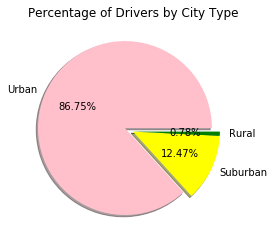

In [15]:
# Calculate Driver Percents
urban_drivers=urban["driver_count"].sum()
sub_drivers=suburban["driver_count"].sum()
rural_drivers=rural["driver_count"].sum()

# Build Pie Charts
total_drivers = [urban_drivers, sub_drivers, rural_drivers]
explode = [.1,0,0]
labels =["Urban","Suburban","Rural"]
colors = ["pink","yellow","green"]

plt.pie(total_drivers,labels=labels,colors=colors,autopct='%1.2f%%',explode=explode,shadow=True)
plt.title("Percentage of Drivers by City Type")
plt.savefig('pyber_driversbycityplot.pdf')
plt.show()